In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from xgboost import XGBRegressor as XGBR
from sklearn.metrics import mean_squared_error as mse

In [2]:
mad_total = pd.read_csv('../analisis_exploratorio/mad_total_limp.csv')
mad_centro = pd.read_csv('../analisis_exploratorio/mad_int_limp.csv')
mad_exterior = pd.read_csv('../analisis_exploratorio/mad_ext_limp.csv')
alquiler = pd.read_csv('../analisis_exploratorio/alquiler_limp.csv')

In [3]:
alquiler

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq,pais,ciudad
0,4,central,Arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664,españa,madrid
1,0,central,Arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664,españa,madrid
2,0,central,Arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664,españa,madrid
3,4,central,Arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664,españa,madrid
4,0,central,Arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,Villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902,españa,madrid
8178,3,central,Villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902,españa,madrid
8179,0,central,Villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902,españa,madrid
8180,0,central,Villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902,españa,madrid


In [4]:
alquiler.Distrito.value_counts()

Distrito
Centro                   1263
Salamanca                 957
noroeste                  693
norte                     658
Chamberi                  582
Chamartin                 516
Tetuan                    507
Retiro                    299
Arganzuela                298
Moncloa - Aravaca         264
sur                       258
Hortaleza                 245
Fuencarral - El Pardo     242
Ciudad Lineal             207
corredor de henares       182
San Blas - Canillejas     143
Latina                    137
Carabanchel               122
Puente de Vallecas        105
sureste                    91
Villaverde                 82
Usera                      70
Vicalvaro                  70
Villa de Vallecas          67
suroeste                   66
Barajas                    30
Moratalaz                  28
Name: count, dtype: int64

In [5]:
#df1 = alquiler
df1 = alquiler[alquiler['Distrito']=='San Blas - Canillejas']

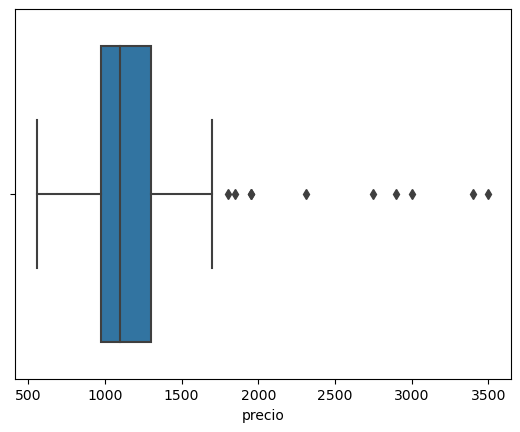

In [6]:
sns.boxplot(x=df1['precio'])
plt.show()

In [7]:
df1 = df1.drop(columns=['distrito_€/m2','€/m2','zona','Distrito','media_alq','garaje','pais','ciudad'])
#df1 = df1.drop(columns=['distrito_€/m2','€/m2','media_alq'])
#df1 = df1.drop(columns=['distrito_€/m2','€/m2','media_alq','garaje','ascensor','caract'])

In [8]:
X = df1.drop('precio', axis=1)

y = df1.precio

In [9]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((114, 6), (29, 6), (114,), (29,))

In [10]:
"""X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)"""

"X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)\n\nX_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)\n\nX_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)"

In [11]:
"""X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)"""

"X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)\n\nX_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)\n\nX_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)"

In [12]:
rfr = RFR(n_estimators=500, random_state=20)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)

222.55021174940362

In [13]:
print(f"Test accuracy: {rfr.score(X_test, y_test):0.4f}")

Test accuracy: 0.1147


In [14]:
df1.precio.mean()

1209.013986013986

In [15]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

18.4075795916251

In [16]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 1.6574833614480422,
 'superficie': 64.41399003004172,
 'habitaciones': 21.961103676464695,
 'plantas': 5.844771477453063,
 'caract': 2.8672356965508947,
 'ascensor': 3.2554157580416105}

In [17]:
xgbr=XGBR(random_state=42)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

167.44029349348207

In [18]:
print(f"Test accuracy: {xgbr.score(X_test, y_test):0.4f}")

Test accuracy: 0.4988


In [19]:
df1.precio.mean()

1209.013986013986

In [20]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

13.849326428846217

In [21]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 1.0254858,
 'superficie': 3.8072898,
 'habitaciones': 73.16855,
 'plantas': 1.0593134,
 'caract': 8.214043,
 'ascensor': 12.725324}

In [22]:
X1 = df1.drop(columns='precio')
y1 = df1.precio

In [23]:
xgbr=XGBR(random_state=42)
xgbr.fit(X1, y1)
y1_pred = xgbr.predict(X1)
mse(y1_pred, y1, squared=False)

33.629119826196586

In [24]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 2.249419,
 'superficie': 4.2985654,
 'habitaciones': 69.16478,
 'plantas': 1.4640112,
 'caract': 11.500683,
 'ascensor': 11.322542}

In [25]:
df1.precio.mean()

1209.013986013986

In [26]:
print(f"Test accuracy: {xgbr.score(X1, y1):0.4f}")

Test accuracy: 0.9945


In [27]:
mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

2.7815327378526753

In [28]:
y1_pred = pd.DataFrame(y1_pred, columns=['prediccion'])
y1 = pd.DataFrame(y1)

In [29]:
y1 = y1.reset_index(drop=True)
y1_pred = y1_pred.reset_index(drop=True)

In [30]:
con = pd.concat([y1,y1_pred], axis=1)

In [31]:
con['dif'] = abs(con['precio'] - con['prediccion'])

con['porcen'] = con['dif']*100/ con['precio']

In [33]:
con

,precio,prediccion,dif,porcen
0,560.0,560.898315,0.898315,0.160413
1,605.0,604.908386,0.091614,0.015143
2,695.0,694.040588,0.959412,0.138045
3,750.0,747.416382,2.583618,0.344482
4,790.0,789.293213,0.706787,0.089467
5,795.0,860.155151,65.155151,8.195617
6,795.0,799.057007,4.057007,0.510315
7,800.0,807.870422,7.870422,0.983803
8,800.0,860.155151,60.155151,7.519394
9,800.0,860.155151,60.155151,7.519394


In [32]:
con.to_excel('san_blas_tasacion_alquiler.xlsx', index=False)